## Final Project Work for Sonification
### Tomer Solomon Mate 3/2/2017

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd


%matplotlib inline

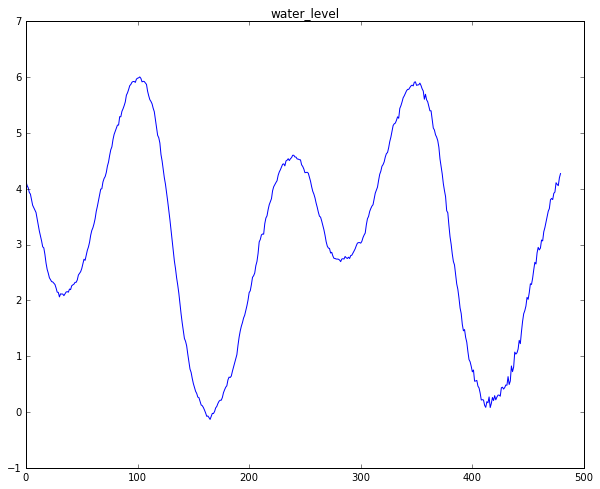

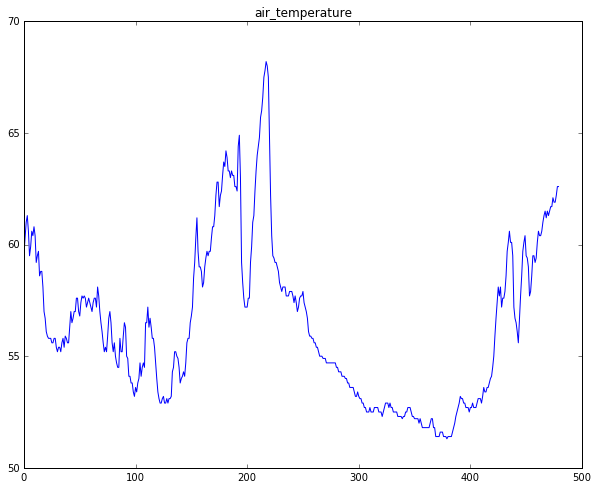

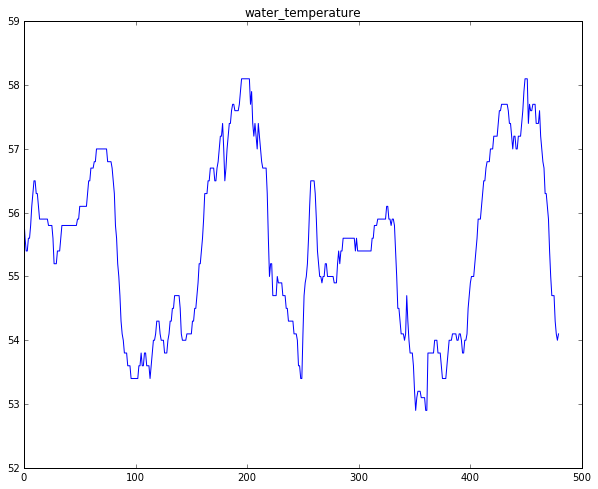

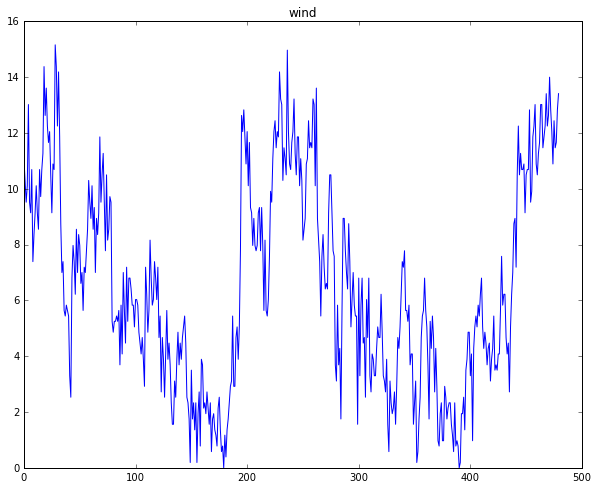

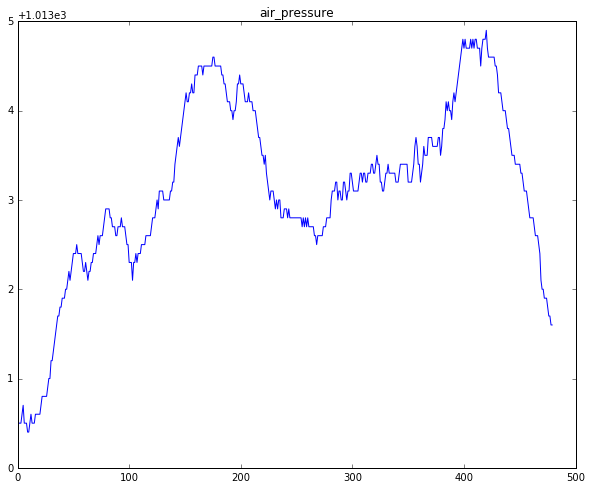

In [6]:
#getting data using API

import requests
import csv
from io import StringIO

product_list = ['water_level','air_temperature','water_temperature','wind','air_pressure']
station = 9414290

#los angeles
#9410660

for i in product_list:
    product = i

    parameters = {"begin_date": 20170401, "end_date": 20170402, "station": station , "product": product, "units": "english", "time_zone": "gmt", "format": "csv","application" : "NOS.COOPS.TAC.WL", "datum": "MLLW"}

    url_small = 'https://tidesandcurrents.noaa.gov/api/datagetter'

    r_test = requests.get(url_small,params=parameters)

    test_data = pd.read_csv(StringIO(r_test.text))

    fig = plt.figure(figsize=(10,8))

    plt.plot(test_data.index,test_data[test_data.columns[1]])
    
    plt.title(i)



In [7]:
##TOMER

import pandas as pd
import requests
import csv
from io import StringIO

#dates + station are ints
#product is string

def create_df(begin_date,end_date,station,product,start_index,end_index):
    parameters = {"begin_date": begin_date , "end_date": end_date , "station": station , "product": product, "units": "english", "time_zone": "gmt", "format": "csv","application" : "NOS.COOPS.TAC.WL", "datum": "MLLW"}
    url_small = 'https://tidesandcurrents.noaa.gov/api/datagetter'
    r_test = requests.get(url_small,params=parameters)
    water_level_data = pd.read_csv(StringIO(r_test.text))
    time = water_level_data.index
    p1 = water_level_data[water_level_data.columns[1]][start_index:end_index]
    #convert to numpy
    p1 = p1.as_matrix()
    return p1


begin_date = 20170401
end_date = 20170407
start_index = 1
end_index = 1500

station_sf = 9414290

p1_waterlevel = create_df(begin_date,end_date,station_sf,'water_level',start_index,end_index)
p1_watertemp = create_df(begin_date,end_date,station_sf,'water_temperature',start_index,end_index)
p1_airtemp = create_df(begin_date,end_date,station_sf,'air_temperature',start_index,end_index)

#station_sd = 9410170

station_mont = 9413450

p2_waterlevel = create_df(begin_date,end_date,station_mont,'water_level',start_index,end_index)
p2_watertemp = create_df(begin_date,end_date,station_mont,'water_temperature',start_index,end_index)
p2_airtemp = create_df(begin_date,end_date,station_mont,'air_temperature',start_index,end_index)

station_tx = 8771450

p3_waterlevel = create_df(begin_date,end_date,station_tx,'water_level',start_index,end_index)
p3_watertemp = create_df(begin_date,end_date,station_tx,'water_temperature',start_index,end_index)
p3_airtemp = create_df(begin_date,end_date,station_tx,'air_temperature',start_index,end_index)

station_fl = 8726607

p4_waterlevel = create_df(begin_date,end_date,station_fl,'water_level',start_index,end_index)
p4_watertemp = create_df(begin_date,end_date,station_fl,'water_temperature',start_index,end_index)
p4_airtemp = create_df(begin_date,end_date,station_fl,'air_temperature',start_index,end_index)

In [8]:
# #to deal with na's for p2
# series = pd.Series(p2_waterlevel)
# series.fillna(series.mean(),inplace=True)
# p2_waterlevel = series.as_matrix()

mask = np.isnan(p2_waterlevel)
p2_waterlevel[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), p2_waterlevel[~mask])

In [35]:
p1 = p4_waterlevel
time = np.linspace(0,len(p1)-1,num=len(p1))

In [36]:
# time = water_temp_data.index
# p1 = water_temp_data[water_temp_data.columns[1]]

In [37]:
# #url = 'https://tidesandcurrents.noaa.gov/met.html?bdate=20170301&edate=20170302&units=standard&timezone=GMT&id=9414290&interval=6&action=data&format=csv'

# #downloaded this, can also use API
# #only for one day

# wl_directory = 'CO-OPS__9414290__wl.csv'
# phys_directory = 'CO-OPS_9414290_from_20170302_to_20170303_phys.csv'
# met_directory = 'CO-OPS_9414290_from_20170301_to_20170302_met.csv'

# data = pd.read_csv(wl_directory,parse_dates=True)
# data.columns = data.columns.str.lower()

# # phys = pd.read_csv(phys_directory,parse_dates=True)
# # phys.columns = phys.columns.str.lower()

# # met = pd.read_csv(met_directory,parse_dates=True)
# # met.columns = met.columns.str.lower()

# data.head()

In [38]:
# fig = plt.figure(figsize=(10,8))

# plt.plot(data.index[1:600],data[' water level'][1:600])

# time = data.index
# p1 = data[' water level']

In [39]:
# interpolation ! 
dur_data = time[-1]
dur_sound = 30.0 

# make a new time vector for all the data points.. 
time_sound = np.linspace(0,dur_sound,len(time))
dt_0 = time_sound[1] - time_sound[0]

print(len(time_sound))
print(int(dur_sound/dt_0))
print('dt_0 = ' + str(dt_0))
print('npts = ' + str(dur_sound/dt_0))
print('===============================')

# ======================================================
# if you want a different duration between notes, you can over or under sample this. 
# if you want to listen exactly to the data, set dt=dt_0
dt = 0.02 # seconds
dur_note = 5*dt
# ======================================================

# if dt is set to = dt_0, the raw data will be used to generate the notes. 
npts_new = dur_sound/dt
print('npts (new time) = ' + str(npts_new))

# make time vector for new sub- or over-sampled sound: 
time_new = np.linspace(0,dur_sound,int(npts_new))
# now determine new y values 
p1_new = np.interp(time_new, time_sound,p1)
print('npts (new p1) = ' + str(len(p1_new)))

1499
1498
dt_0 = 0.0200267022697
npts = 1498.0
npts (new time) = 1500.0
npts (new p1) = 1500


In [40]:
# make an arbitrary frequency range, not equal tempered or anything like that.. just a range: 
f_min = 220.0
f_max = 830.0
mNotes = np.linspace(f_min,f_max,20)

# define the range of data values that will be interpolated FROM 
# THEN INTERPOLATE THE DATA FROM y-values TO FREQUENCY SPACE

def interpYvals_to_freq(y):
    y_min = min(y)
    y_max = max(y) 
    # linear array of the possible data values
    y_interp = np.linspace(y_min,y_max+(y_max-y_min)/len(mNotes), len(mNotes))
    
    data_in_freqvals = np.interp(y,y_interp,mNotes)
    
    return data_in_freqvals

data_in_freqvals = interpYvals_to_freq(p1_new)
print(len(data_in_freqvals))
#print(data_in_freqvals)

1500


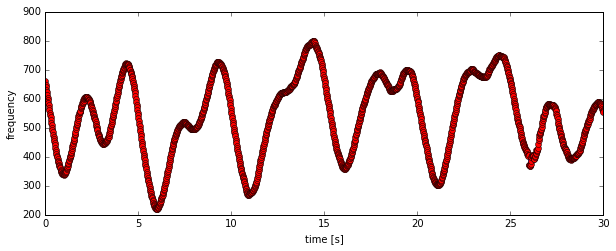

In [41]:
# PLOT THE RE-SAMPLED DATA
fig = plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(time_new,data_in_freqvals,'b-')
plt.plot(time_new,data_in_freqvals,'ro')

# add lines ! and note durations ! 

plt.xlabel('time [s]')
plt.ylabel('frequency')

plt.show()

In [26]:
# GENERATE THE RTcmix score ! (alternate to generating the midi score)
base_name = 'water_temp'
score_name = base_name + '.sco'

# ====================
f_out = open("./" + score_name , 'w')
# YOU MUST DELETE THE SOUND FILE BEFORE RUNNING (either with python or with -clobber )
f_out.write("set_option(\"clobber = on\")")
f_out.write("rtsetparams(44100, 1)\n")
f_out.write("reset(44100)\n")
f_out.write("load(\"WAVETABLE\")\n")

output_string = 'rtoutput(\"' + base_name + '.wav\")\n'  
# don't need the brackets to make it an array ! 
print(output_string)
f_out.write(output_string)

f_out.write("waveform = maketable(\"wave\", 1000, 1.0, 0.4, 0.2)\n")
f_out.write("ampenv = maketable(\"window\", 1000, \"hamming\")\n")       
# write out the score ! 
# (start time, duration, amplitude, frequency, channel mix [0 left, 1.0 right],
# table_handle (which waveform to use)

# for now, constants: 
            
# reset(44100) makes it very very smooth... 
            
amp = 10000 
mix = 0.5
tab_han = 'waveform'

for i,note_val in enumerate(data_in_freqvals):
    t_start = time_new[i]
    dur = dur_note # DO NOT FORGET TO CHANGE THIS WHEN DOING PART 2 !! 
    freq = note_val
    note_string = 'WAVETABLE(' + str(t_start) + ', ' \
                  + str(dur)  + ', ' + str(amp)+ '*ampenv' + ', ' \
                  + str(freq)  + ', ' + str(mix)  + ', ' \
                  +  tab_han + ')\n' 
    f_out.write(note_string)
f_out.close()

rtoutput("water_temp.wav")



In [17]:
import subprocess as sp
cmix_cmd = 'CMIX < ' + score_name
print(cmix_cmd)

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
! ls *.wav

CMIX < water_temp.sco
project.wav                  water_temp_music3.wav
project_music.wav            water_temp_music_1500.wav
water_level.wav              water_temp_music_1500_p1.wav
water_level_music.wav        water_temp_music_1500_p2.wav
water_temp.wav               water_temp_music_1500_p3.wav
water_temp_music.wav         water_temp_music_1500_p4.wav
water_temp_music1.wav        water_temp_music_p1.wav
water_temp_music2.wav


In [18]:
# these functions are used for "sampling" the data for sound: extracting discrete pitch values and durations

from bisect import bisect_left
from scipy import interpolate as interp
import copy

# first map the original data values to a new range that reflects the range of notes or frequencies. 
# then call this as 
# sp = Spline(x1, data_in_freqvals) # this interpolates the data smoothly over x1, whatever x is (time or space) 
# values = mNotes # (the values at which notes or pitches are defined-- can be chromatic or not, right?
# roots = sp.findroots(values) # this locates the times and indexes on the data curve at which the mNotes values occur

class Spline:
    def __init__(self, x, y, s=3):
        self.x = x
        self.y = y
    
    def findroots(self, values):
        roots, notes = [], []
        for v in values:
            cs = interp.CubicSpline(self.x, self.y - v)
            v_roots = cs.roots()
            for r in v_roots:
                if(r > 0):
                    roots.append(r)
                    notes.append(v)
            
        # Sort the notes according to occurence
        notes = np.asarray([x for (y,x) in sorted(zip(roots, notes))])
        roots = np.asarray(sorted(roots))
        
        return roots, notes
    
# define parameters dictionary
# bkh @cw: wtf is this? what does it do and why ? ? 
class structtype():
    pass

# THIS will be necessary when using non-chromatic scales 
# bkh @cw : why is this necessary? when is it used? 

#    Assumes myList is sorted. Returns closest value to myNumber.
#    If two numbers are equally close, return the smallest number.

def takeClosest(myList, myNumber):
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
       return after
    else:
       return before


In [231]:
# MAKE THE FIRST SET OF POSSIBLE NOTES TO CHOOSE FROM ! 
# i.e the range of values that will be interpolated TO !

# a Chromatic Scale of n octaves 
n_octaves_total = 2.0
root_note  = 220.0
top_note = root_note*(2**n_octaves_total)
num_ints = 2*12  # 12= a 'normal' 12-tone scale
# if you want to go microtonal, make this number larger... 

mNotes = np.logspace(np.log2(root_note), np.log2(top_note), num_ints*n_octaves_total, base=2.0)
print(mNotes)

[ 220.          226.58568442  233.36851084  240.35438069  247.54937206
  254.95974498  262.59194689  270.45261823  278.54859821  286.88693077
  295.47487073  304.31989006  313.42968442  322.81217983  332.47553958
  342.42817132  352.67873438  363.23614732  374.10959567  385.30853993
  396.84272379  408.72218262  420.95725222  433.55857776  446.53712308
  459.90418024  473.67137932  487.85069852  502.45447463  517.49541375
  532.98660232  548.94151852  565.37404401  582.29847599  599.72953963
  617.68240094  636.17267987  655.216464    674.83032245  695.03132037
  715.83703374  737.26556465  759.33555713  782.06621326  805.47730998
  829.58921622  854.42291067  880.        ]


In [232]:
# OR USE OTHER MUSICAL STRUCTURES !  (from the notebook 4_PITCHES and Bill's examples)
modes = {
    'ionian':[2,2,1,2,2,2,1],
    'dorian':[2,1,2,2,2,1,2],
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
}

intervals = [0] + modes['mixolydian'] + modes['mixolydian']
print(intervals)
print(type(intervals))
#intervals2 = intervals.append(modes['phrygian'])
#print(intervals2)

x = np.cumsum(intervals[:-1])
print(x)
#indexes2 = [0]
#for val in x[:-1]:
#    indexes2.append(val)

#indexes2 = np.array(indexes2)
#print(type(indexes2))
indexes = np.array(x)

C4 = 440.0 * 2**(3/12-1)
print(C4)

def notename2freq(k,v,f0):
    freqs = f0*2**(v+k/12)
    return freqs

mNotes = notename2freq(indexes,-1.5,C4)
print(mNotes)

[0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2]
<class 'list'>
[ 0  2  4  5  7  9 10 12 14 16 17 19 21 22]
261.6255653005986
[  92.49860568  103.82617439  116.54094038  123.47082531  138.59131549
  155.56349186  164.81377846  184.99721136  207.65234879  233.08188076
  246.94165063  277.18263098  311.12698372  329.62755691]


In [233]:
# NOW again, we have to interpolate the data from its orignial values to frequencies.. 
# we can use a linear mapping as in part (1), with the interp function: 

def interpYvals_to_freq(y):
    y_min = min(y)
    y_max = max(y) 
    # linear array of the possible data values
    y_interp = np.linspace(y_min ,y_max+(y_max-y_min)/len(mNotes), len(mNotes))    
    data_in_freqvals = np.interp(y,y_interp,mNotes)    
    return data_in_freqvals

data_in_freqvals = interpYvals_to_freq(p1)
#print(data_in_freqvals)

In [234]:
# MAP NOTE VALUES TO DATA

sp = Spline(time_sound, data_in_freqvals)

roots, notes = sp.findroots(mNotes)
times = roots

durations = times[1:]-times[:-1]
durs = 0.8*durations



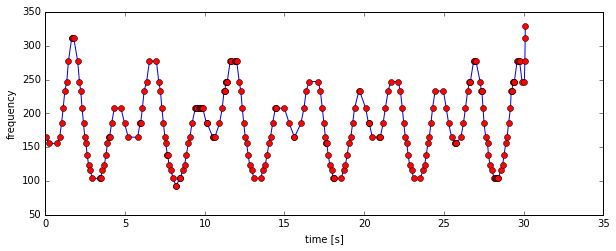

In [235]:
# PLOT THE RE-SAMPLED DATA
fig = plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(times,notes,'b-')
plt.plot(times,notes,'ro')

# add lines ! and note durations ! 

plt.xlabel('time [s]')
plt.ylabel('frequency')

plt.show()

In [236]:
# GENERATE THE RTcmix score ! (alternate to generating the midi score)
base_name = 'water_temp_music_1500_p2'
score_name = base_name + '.sco'

# ====================
f_out = open("./" + score_name , 'w')
# YOU MUST DELETE THE SOUND FILE BEFORE RUNNING (either with python or with -clobber )
f_out.write("set_option(\"clobber = on\")")

f_out.write("rtsetparams(44100, 1)\n")
f_out.write("load(\"WAVETABLE\")\n")

output_string = 'rtoutput(\"' + base_name + '.wav\")\n'  
# don't need the brackets to make it an array ! 
print(output_string)
f_out.write(output_string)

f_out.write("waveform = maketable(\"wave\", 1000, 1.0, 0.4, 0.2)\n")
f_out.write("ampenv = maketable(\"window\", 1000, \"hamming\")\n")       
# write out the score ! 
# (start time, duration, amplitude, frequency, channel mix [0 left, 1.0 right],
# table_handle (which waveform to use)

# for now, constants: 
            
# reset(44100) makes it very very smooth... 
            
amp = 10000 
mix = 0.5
tab_han = 'waveform'

for i,note_val in enumerate(notes):
    t_start = times[i]
    dur = durations[i]
    freq = note_val
    note_string = 'WAVETABLE(' + str(t_start) + ', ' \
                  + str(dur)  + ', ' + str(amp)+ '*ampenv' + ', ' \
                  + str(freq)  + ', ' + str(mix)  + ', ' \
                  +  tab_han + ')\n' 
    f_out.write(note_string)
    if i==len(durations)-1:
        break
f_out.close()

rtoutput("water_temp_music_1500_p2.wav")



In [237]:
import subprocess as sp
cmix_cmd = 'CMIX < ' + score_name
print(cmix_cmd)

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True
runCMIX.wait()
! ls *.wav

CMIX < water_temp_music_1500_p2.sco
project.wav                  water_temp_music2.wav
project_music.wav            water_temp_music3.wav
water_level.wav              water_temp_music_1500.wav
water_level_music.wav        water_temp_music_1500_p1.wav
water_temp.wav               water_temp_music_1500_p3.wav
water_temp_music.wav         water_temp_music_1500_p4.wav
water_temp_music1.wav        water_temp_music_p1.wav
